In [1]:
print(packages_import_statement)
import requests


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import os

import re
import time 

from pprint import pprint




In [2]:
#https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5
url =  "https://data.cityofnewyork.us/resource/ebb7-mvp5.json"
params = {"$limit":25000}
r = requests.get(url = url,params=params)
data = r.json()

#### #### #### #### #### #### #### #### 
nyc_data_id = "3hog848no4ghvwmnh8cq6wuah"
nyc_secret_key = "1p5t55atth2xbefr1o56nwhppkl1cfzy90dha54dfnvwonwykp"

app_token = "r1RG3NrdpKaV130FpUzfZIzZJ"
secret_token="Laws-WtOJzfMxdJ7KsPS5SVfXnNagTgmiAKs"
#### #### #### #### #### #### #### #### 

In [3]:
df = pd.DataFrame(data)
print(df.dtypes)
df.describe()

month                  object
borough                object
communitydistrict      object
refusetonscollected    object
papertonscollected     object
mgptonscollected       object
borough_id             object
resorganicstons        object
schoolorganictons      object
leavesorganictons      object
xmastreetons           object
dtype: object


,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,borough_id,resorganicstons,schoolorganictons,leavesorganictons,xmastreetons
count,21166,21166,21166,21166,18544,18256,21166,1613,1030,737,1480
unique,367,5,18,20521,16638,15720,5,1534,948,724,822
top,1995 / 11,Brooklyn,03,3147.300000000000182,367.750000000000000,0E-15,3,12.370000000000001,29.100000000000001,44.619999999999997,16.800000000000001
freq,59,6399,1797,4,4,5,6399,4,6,2,18


In [4]:
df['boroughid_communitydistrict'] = df['borough_id']+"__"+df['communitydistrict']
df['boroughid_communitydistrict'].value_counts().head(5)

5__02    367
5__03    366
5__01    366
1__03    365
1__05    364
Name: boroughid_communitydistrict, dtype: int64

Text(0.5, 1.0, 'Quantity of Months of Data\nPer Community District')

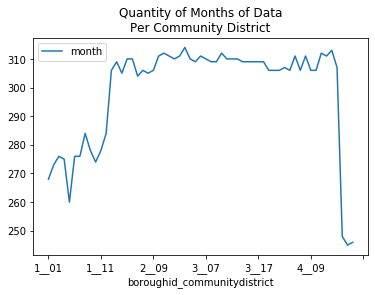

In [5]:
df[["boroughid_communitydistrict","month","refusetonscollected","papertonscollected","mgptonscollected"]].dropna().groupby(by=['boroughid_communitydistrict']).agg({"month":"count"}).plot()
plt.title("Quantity of Months of Data\nPer Community District")

In [6]:
df['diversion_rate'] = (df['papertonscollected'].astype(float)\
                        +df['mgptonscollected'].astype(float))/df['refusetonscollected'].astype(float)
df[["boroughid_communitydistrict","month","diversion_rate","refusetonscollected","papertonscollected","mgptonscollected"]]

,boroughid_communitydistrict,month,diversion_rate,refusetonscollected,papertonscollected,mgptonscollected
0,2__01,2020 / 11,0.076877,519.529999999999973,20.379999999999999,19.559999999999999
1,2__02,2020 / 11,0.166396,381.500000000000000,27.460000000000001,36.020000000000003
2,2__03,2020 / 11,0.106066,521.750000000000000,24.160000000000000,31.180000000000000
3,2__04,2020 / 11,0.111687,991.610000000000014,46.270000000000003,64.480000000000004
4,2__05,2020 / 11,0.134694,842.430000000000064,46.939999999999998,66.530000000000001
...,...,...,...,...,...,...
21161,5__02,1990 / 06,NaN,3485.800000000000182,NaN,NaN
21162,5__03,1990 / 06,NaN,4242.199999999999818,NaN,NaN
21163,1__03,1990 / 01,NaN,24.400000000000002,NaN,NaN
21164,4__12,1990 / 01,NaN,8.400000000000000,NaN,NaN


In [20]:
df['papertonscollected']=df['papertonscollected'].astype(float)
df['mgptonscollected']=df['mgptonscollected'].astype(float)
df['refusetonscollected']=df['refusetonscollected'].astype(float)

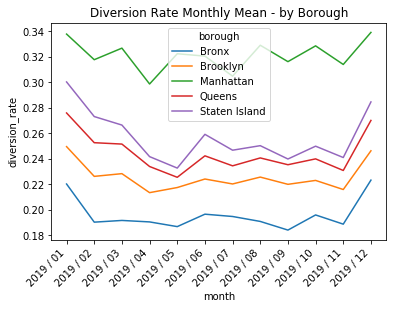

In [7]:
sns.lineplot(data=df[df['month'].str.contains("2019")]\
             .groupby(by=['month','borough']).agg({"diversion_rate":"mean"}).dropna().reset_index()\
            ,x='month',y='diversion_rate',hue='borough')
locs, labels = plt.xticks() 
plt.xticks(rotation=45,ha='right')
plt.title("Diversion Rate Monthly Mean - by Borough");

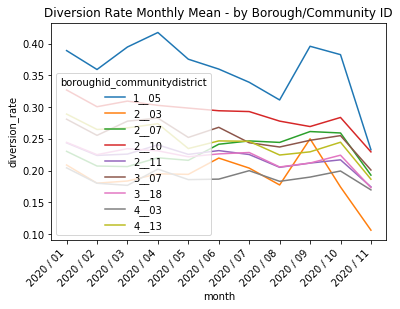

In [8]:
cds_to_use = df['boroughid_communitydistrict'].sample(10)

sns.lineplot(data=df[(df['month'].str.contains("2020"))&(df['boroughid_communitydistrict'].isin(cds_to_use))]\
             .groupby(by=['month','boroughid_communitydistrict']).agg({"diversion_rate":"mean"}).dropna().reset_index()\
            ,x='month',y='diversion_rate',hue='boroughid_communitydistrict')
locs, labels = plt.xticks() 
plt.xticks(rotation=45,ha='right')
plt.title("Diversion Rate Monthly Mean - by Borough/Community ID");

In [9]:
## To be hashed out with group sunday night

In [15]:
df['month_clean'] = df['month'].apply(lambda x: x.split("/")[1]).astype(int)
df['year_clean'] = df['month'].apply(lambda x: x.split("/")[0]).astype(int)
df[['month','month_clean','year_clean']].sample(10)

,month,month_clean,year_clean
9609,2007 / 05,5,2007
4921,2013 / 12,12,2013
17737,1995 / 11,11,1995
14795,2000 / 01,1,2000
11390,2004 / 10,10,2004
5572,2013 / 01,1,2013
20612,1991 / 10,10,1991
17786,1995 / 10,10,1995
7241,2010 / 09,9,2010
18034,1995 / 06,6,1995


In [45]:
#introduce a custom function performing distribution analysis
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    ''' x - array of observations
    log_scale - analyze distribution of log(x) if True
    fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    bins - how many bins to use for binning the data
    vis_means - show mean and std lines if True
    vis_curve - show interpolated distribution curve over the histogram bars if True
    print_outputs - print mean, std and percentiles
    '''
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 0.24
Standard deviation = 0.08
1 percentile = 0.13
5 percentile = 0.15
25 percentile = 0.18
50 percentile = 0.23
75 percentile = 0.28
95 percentile = 0.40
99 percentile = 0.47


/Users/brian_newborn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


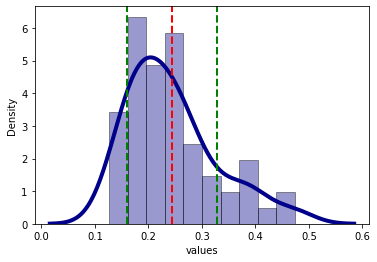

In [50]:
#Pre-Lockdown Diversion Rates

#Jan 2018 - Feb 2020

pre_lockdown_stats=\
df[(df['year_clean'].isin([2018,2019]))|
  ((df['year_clean'].isin([2020]))&(df['month_clean'].isin([1,2])))]\
[['boroughid_communitydistrict','month_clean','year_clean','papertonscollected','mgptonscollected','refusetonscollected']]\
.groupby(by=['boroughid_communitydistrict']).agg({"papertonscollected":"sum"
                                                  ,"mgptonscollected":"sum"
                                                  ,"refusetonscollected":"sum"})
pre_lockdown_stats['diversion_rate'] = (pre_lockdown_stats['papertonscollected']\
                        +pre_lockdown_stats['mgptonscollected'])/pre_lockdown_stats['refusetonscollected']

distribution_analysis(pre_lockdown_stats['diversion_rate'],bins=10)

Mean = 0.25
Standard deviation = 0.08
1 percentile = 0.14
5 percentile = 0.17
25 percentile = 0.20
50 percentile = 0.24
75 percentile = 0.29
95 percentile = 0.40
99 percentile = 0.47


/Users/brian_newborn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


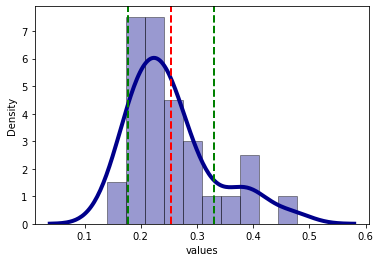

In [51]:
#Post-Lockdown Diversion Rates

#March 2020 - Nov 2020

post_lockdown_stats=\
df[(df['year_clean'].isin([2020]))&(df['month_clean']>=3)]\
[['boroughid_communitydistrict','month_clean','year_clean','papertonscollected','mgptonscollected','refusetonscollected']]\
.groupby(by=['boroughid_communitydistrict']).agg({"papertonscollected":"sum"
                                                  ,"mgptonscollected":"sum"
                                                  ,"refusetonscollected":"sum"})
post_lockdown_stats['diversion_rate'] = (post_lockdown_stats['papertonscollected']\
                        +post_lockdown_stats['mgptonscollected'])/post_lockdown_stats['refusetonscollected']

distribution_analysis(post_lockdown_stats['diversion_rate'],bins=10)

PRE LOCKDOWN
Mean = 0.24
Standard deviation = 0.08
1 percentile = 0.13
5 percentile = 0.15
25 percentile = 0.18
50 percentile = 0.23
75 percentile = 0.28
95 percentile = 0.40
99 percentile = 0.47


/Users/brian_newborn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


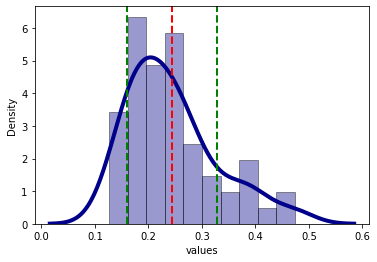

****************************************************************************************************
****************************************************************************************************
****************************************************************************************************
POST LOCKDOWN
Mean = 0.25
Standard deviation = 0.08
1 percentile = 0.14
5 percentile = 0.17
25 percentile = 0.20
50 percentile = 0.24
75 percentile = 0.29
95 percentile = 0.40
99 percentile = 0.47


/Users/brian_newborn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


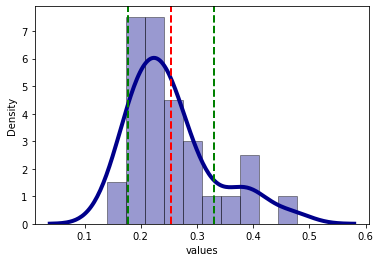

In [52]:
print("PRE LOCKDOWN")
distribution_analysis(pre_lockdown_stats['diversion_rate'],bins=10)
print("**"*50)
print("**"*50)
print("**"*50)
print("POST LOCKDOWN")
distribution_analysis(post_lockdown_stats['diversion_rate'],bins=10)

Mean = 0.01
Standard deviation = 0.01
1 percentile = -0.02
5 percentile = -0.01
25 percentile = 0.00
50 percentile = 0.01
75 percentile = 0.02
95 percentile = 0.03
99 percentile = 0.04


/Users/brian_newborn/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


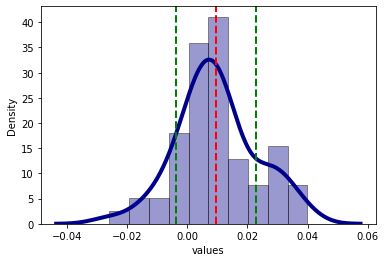

In [58]:
delta = pre_lockdown_stats[['diversion_rate']]\
.merge(right=post_lockdown_stats[['diversion_rate']],left_index=True,right_index=True,suffixes=("_pre","_post"))
delta['delta'] = delta['diversion_rate_post']-delta['diversion_rate_pre']
distribution_analysis(delta['delta'],bins=10)